In [ ]:
import pandas as pd
import re
import string
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving youtube_reviews (1).csv to youtube_reviews (1).csv


In [ ]:
df = pd.read_csv('youtube_reviews.csv')

# 3. Label Sentimen (Positif, Netral, Negatif)
def label_sentiment(score):
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

In [ ]:
df['label'] = df['score'].apply(label_sentiment)

# 4. Text Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

Akurasi: 0.825

Classification Report:
               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         6
      netral       0.00      0.00      0.00         1
     positif       0.82      1.00      0.90        33

    accuracy                           0.82        40
   macro avg       0.27      0.33      0.30        40
weighted avg       0.68      0.82      0.75        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


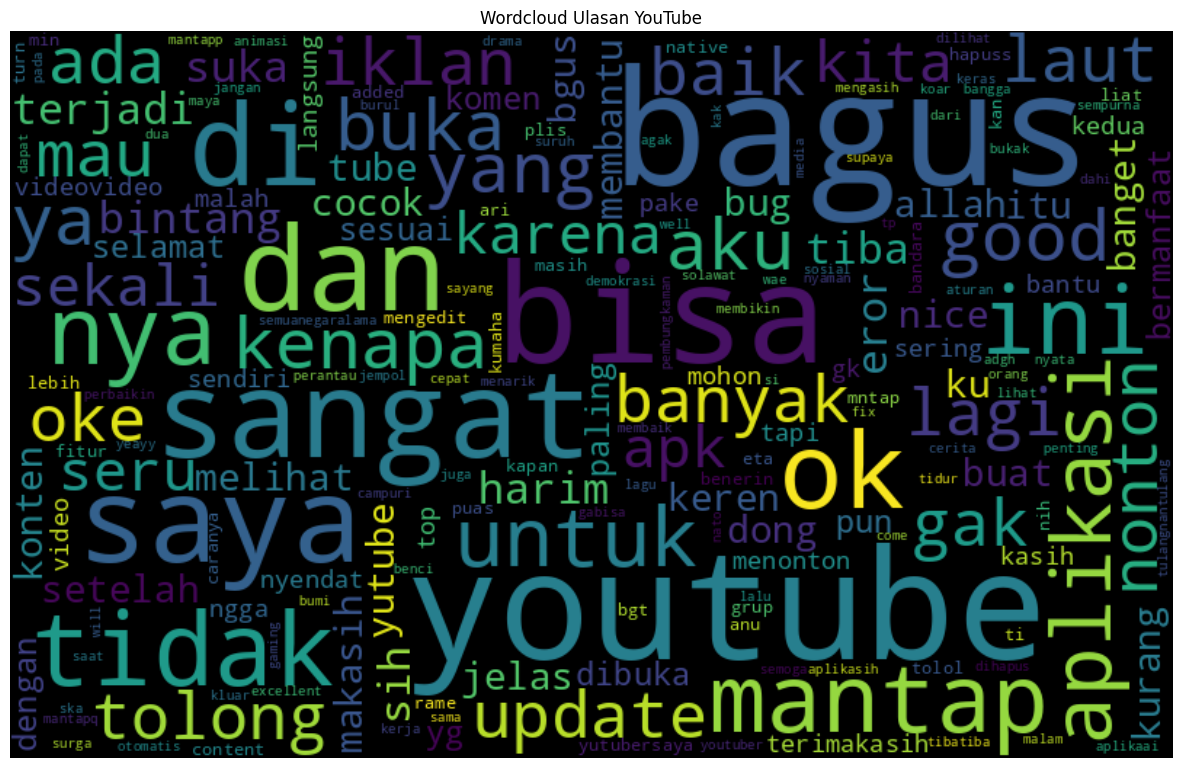

['tfidf_vectorizer.pkl']

In [ ]:
df['clean_content'] = df['content'].apply(clean_text)

# 5. TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_content']).toarray()
y = df['label']

# 6. Split Data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 7. Train Model SVM
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# 8. Predict dan Evaluasi
y_pred = model.predict(x_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Wordcloud untuk visualisasi
all_words = ' '.join([text for text in df['clean_content']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Ulasan YouTube")
plt.show()

# 10. Simpan Model dan TF-IDF
joblib.dump(model, 'model_svm.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

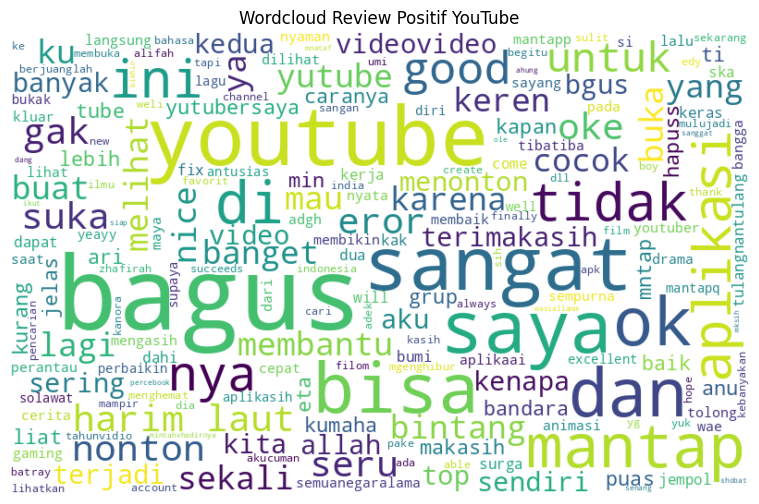

In [ ]:
# Wordcloud untuk Sentimen Positif
positive_text = ' '.join(df[df['label'] == 'positif']['clean_content'])
wordcloud_positive = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(positive_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Review Positif YouTube")
plt.show()


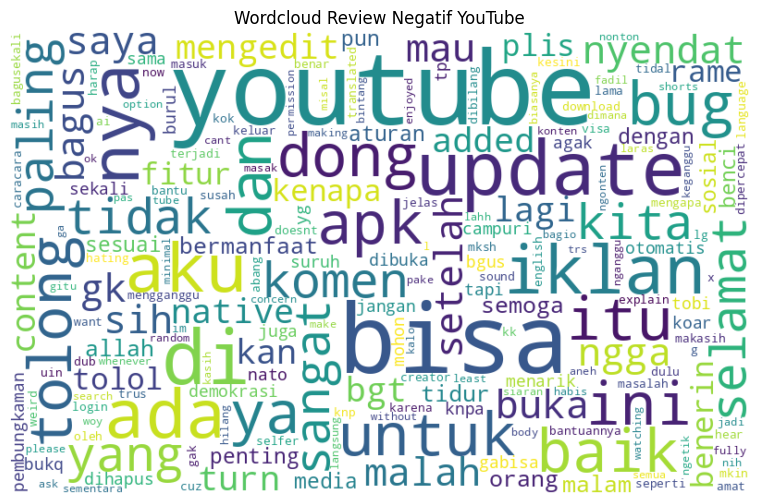

In [ ]:
# Wordcloud untuk Sentimen Negatif
negative_text = ' '.join(df[df['label'] == 'negatif']['clean_content'])
wordcloud_negative = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Review Negatif YouTube")
plt.show()